# Projeto - Relatório de fechamento de mercado por e-mail

### Desafio

* Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar

<br>

  **Passo 1** - Importar Módulos e bibliotecas.

  **Passo 2** - Pegar dados do ibovespa e do Dólar no Yahoo Finance.

  **Passo 3** - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.

  **Passo 4** - Calcular o retorno diário, mensal e anual.

  **Passo 5** - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão para o texto anexado no e-mail.

  **Passo 6** - Fazer o gráficos dos ativos.

  **Passo 7** - Enviar o e-mail.

## Passo 1: Importando os módulos necessários

In [20]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

In [22]:
hoje = datetime.date.today()
hoje

datetime.date(2023, 2, 8)

In [23]:
#Método de conveniência para conversão de frequência e reamostragem de séries temporais. 
#O objeto deve ter um índice semelhante a data e hora ( DatetimeIndex , PeriodIndex ou TimedeltaIndex ) ou o chamador deve passar o rótulo 
#de uma série/índice semelhante a data e hora para o parâmetro on/ palavra-chave.level
nomes_das_pessoas = ['Breno','Leandro']
codigos_de_negociacao = ['^BVSP','BRL=X', 'ZS=F' ]

hoje = datetime.date.today()
um_ano_atras = hoje - datetime.timedelta(days=365)

dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)
dados_mercado = dados_mercado.resample("1D").last()

display(dados_mercado)

#dados_mercado.drop_duplicates(dados_mercado['Date'], inplace=True)
dados_mercado

[*********************100%***********************]  3 of 3 completed


Adj Close                      Close                       High  \
               BRL=X     ZS=F     ^BVSP   BRL=X     ZS=F     ^BVSP   BRL=X   
Date                                                                         
2022-02-08    5.2626  1569.00  112234.0  5.2626  1569.00  112234.0  5.2849   
2022-02-09    5.2584  1594.75  112461.0  5.2584  1594.75  112461.0  5.2880   
2022-02-10    5.2345  1574.25  113359.0  5.2345  1574.25  113359.0  5.2446   
2022-02-11    5.2487  1583.00  113572.0  5.2487  1583.00  113572.0  5.2512   
2022-02-12       NaN      NaN       NaN     NaN      NaN       NaN     NaN   
...              ...      ...       ...     ...      ...       ...     ...   
2023-02-03    5.0492  1532.00  108490.0  5.0492  1532.00  108490.0  5.1347   
2023-02-04       NaN      NaN       NaN     NaN      NaN       NaN     NaN   
2023-02-05       NaN      NaN       NaN     NaN      NaN       NaN     NaN   
2023-02-06    5.1498  1521.25  108456.0  5.1498  1521.25  108456.0  5.2060   
2023-02-07    5.1457  1515.25  107920.0  5.1457  1515.25  107920.0  5.2057   

                                    Low                         Open           \
               ZS=F     ^BVSP     BRL=X     ZS=F     ^BVSP     BRL=X     ZS=F   
Date                                                                            
2022-02-08  1586.50  112251.0  5.251000  1559.00  110943.0  5.262800  1585.00   
2022-02-09  1599.50  113163.0  5.232774  1566.50  111710.0  5.256489  1570.50   
2022-02-10  1633.00  113812.0  5.170000  1565.50  112163.0  5.231429  1594.75   
2022-02-11  1594.75  114899.0  5.182800  1563.50  113128.0  5.248600  1573.00   
2022-02-12      NaN       NaN       NaN      NaN       NaN       NaN      NaN   
...             ...       ...       ...      ...       ...       ...      ...   
2023-02-03  1539.75  110570.0  5.046758  1524.75  108185.0  5.049200  1533.50   
2023-02-04      NaN       NaN       NaN      NaN       NaN       NaN      NaN   
2023-02-05      NaN       NaN       NaN      NaN       NaN       NaN      NaN   
2023-02-06  1535.50  108710.0  5.147992  1516.75  107416.0  5.149800  1532.00   
2023-02-07  1530.50  109037.0  5.133384  1511.00  107234.0  5.145700  1521.00   

                     Volume                        
               ^BVSP  BRL=X      ZS=F       ^BVSP  
Date                                               
2022-02-08  111995.0    0.0  176069.0  10157500.0  
2022-02-09  112233.0    0.0  190630.0  13794500.0  
2022-02-10  112462.0    0.0  255540.0  13267900.0  
2022-02-11  113368.0    0.0  184659.0  18602800.0  
2022-02-12       NaN    NaN       NaN         NaN  
...              ...    ...       ...         ...  
2023-02-03  110141.0    0.0  101436.0  13235300.0  
2023-02-04       NaN    NaN       NaN         NaN  
2023-02-05       NaN    NaN       NaN         NaN  
2023-02-06  108518.0    0.0  131712.0  11514600.0  
2023-02-07  108727.0    0.0  131712.0  12956300.0  

[365 rows x 18 columns]

Adj Close                      Close                       High  \
               BRL=X     ZS=F     ^BVSP   BRL=X     ZS=F     ^BVSP   BRL=X   
Date                                                                         
2022-02-08    5.2626  1569.00  112234.0  5.2626  1569.00  112234.0  5.2849   
2022-02-09    5.2584  1594.75  112461.0  5.2584  1594.75  112461.0  5.2880   
2022-02-10    5.2345  1574.25  113359.0  5.2345  1574.25  113359.0  5.2446   
2022-02-11    5.2487  1583.00  113572.0  5.2487  1583.00  113572.0  5.2512   
2022-02-12       NaN      NaN       NaN     NaN      NaN       NaN     NaN   
...              ...      ...       ...     ...      ...       ...     ...   
2023-02-03    5.0492  1532.00  108490.0  5.0492  1532.00  108490.0  5.1347   
2023-02-04       NaN      NaN       NaN     NaN      NaN       NaN     NaN   
2023-02-05       NaN      NaN       NaN     NaN      NaN       NaN     NaN   
2023-02-06    5.1498  1521.25  108456.0  5.1498  1521.25  108456.0  5.2060   
2023-02-07    5.1457  1515.25  107920.0  5.1457  1515.25  107920.0  5.2057   

                                    Low                         Open           \
               ZS=F     ^BVSP     BRL=X     ZS=F     ^BVSP     BRL=X     ZS=F   
Date                                                                            
2022-02-08  1586.50  112251.0  5.251000  1559.00  110943.0  5.262800  1585.00   
2022-02-09  1599.50  113163.0  5.232774  1566.50  111710.0  5.256489  1570.50   
2022-02-10  1633.00  113812.0  5.170000  1565.50  112163.0  5.231429  1594.75   
2022-02-11  1594.75  114899.0  5.182800  1563.50  113128.0  5.248600  1573.00   
2022-02-12      NaN       NaN       NaN      NaN       NaN       NaN      NaN   
...             ...       ...       ...      ...       ...       ...      ...   
2023-02-03  1539.75  110570.0  5.046758  1524.75  108185.0  5.049200  1533.50   
2023-02-04      NaN       NaN       NaN      NaN       NaN       NaN      NaN   
2023-02-05      NaN       NaN       NaN      NaN       NaN       NaN      NaN   
2023-02-06  1535.50  108710.0  5.147992  1516.75  107416.0  5.149800  1532.00   
2023-02-07  1530.50  109037.0  5.133384  1511.00  107234.0  5.145700  1521.00   

                     Volume                        
               ^BVSP  BRL=X      ZS=F       ^BVSP  
Date                                               
2022-02-08  111995.0    0.0  176069.0  10157500.0  
2022-02-09  112233.0    0.0  190630.0  13794500.0  
2022-02-10  112462.0    0.0  255540.0  13267900.0  
2022-02-11  113368.0    0.0  184659.0  18602800.0  
2022-02-12       NaN    NaN       NaN         NaN  
...              ...    ...       ...         ...  
2023-02-03  110141.0    0.0  101436.0  13235300.0  
2023-02-04       NaN    NaN       NaN         NaN  
2023-02-05       NaN    NaN       NaN         NaN  
2023-02-06  108518.0    0.0  131712.0  11514600.0  
2023-02-07  108727.0    0.0  131712.0  12956300.0  

[365 rows x 18 columns]

In [24]:
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['Dólar','Soybean Futures,May-2023','Ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,Dólar,"Soybean Futures,May-2023",Ibovespa
Date,,,
2022-02-08,5.262600,1569.00,112234.0
2022-02-09,5.258400,1594.75,112461.0
2022-02-10,5.234500,1574.25,113359.0
2022-02-11,5.248700,1583.00,113572.0
2022-02-14,5.249956,1570.00,113807.0
...,...,...,...
2023-02-01,5.072200,1520.25,112303.0
2023-02-02,5.053500,1534.25,109935.0
2023-02-03,5.049200,1532.00,108490.0


In [25]:
# last() fornece o número do fechamento, podendo-se também utilizar mean(), sum() e etc
dado_anual = dados_fechamento.resample("Y").last()
dado_semanal = dados_fechamento.resample("S").last()
dado_mensal = dados_fechamento.resample("M").last()

dado_mensal

,Dólar,"Soybean Futures,May-2023",Ibovespa
Date,,,
2022-02-28,5.1222,1590.25,113142.0
2022-03-31,4.7697,1618.25,119999.0
2022-04-30,4.9378,1708.25,107876.0
2022-05-31,4.7524,1683.25,111351.0
2022-06-30,5.1809,1675.00,98542.0
2022-07-31,5.1827,1637.00,103165.0
2022-08-31,5.1219,1507.50,109523.0
2022-09-30,5.3962,1364.75,110037.0
2022-10-31,5.2885,1407.00,116037.0


In [26]:
#calculando o retorno dos ativos; a primeira data não retorna pois não há retorno
retorno_anual = dado_anual.pct_change().dropna()
retorno_mensal = dado_mensal.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

retorno_diario

,Dólar,"Soybean Futures,May-2023",Ibovespa
Date,,,
2022-02-09,-0.000798,0.016412,0.002023
2022-02-10,-0.004545,-0.012855,0.007985
2022-02-11,0.002713,0.005558,0.001879
2022-02-14,0.000239,-0.008212,0.002069
2022-02-15,-0.006849,-0.011943,0.007495
...,...,...,...
2023-02-01,-0.008348,-0.011541,-0.010825
2023-02-02,-0.003687,0.009209,-0.021086
2023-02-03,-0.000851,-0.001467,-0.013144


In [27]:
# retorno_2023_02_03 = retorno_diario.loc['2022-02-08 00:00:00+00:00', 'Dólar']
# retorno_2023_02_03_iloc = retorno_diario.iloc[0, 0]

#quero a última cotação então utilizo  iloc[-1,0]
retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_soy = retorno_diario.iloc[-1,1]
retorno_diario_ibov = retorno_diario.iloc[-1,2]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_soy = retorno_mensal.iloc[-1,1]
retorno_mensal_ibov = retorno_mensal.iloc[-1,2]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_soy = retorno_anual.iloc[-1,1]
retorno_anual_ibov = retorno_anual.iloc[-1,2]
#print(retorno_2023_02_03)


In [28]:
retorno_diario_dolar = round((retorno_diario_dolar*100), 2)
retorno_diario_soy = round((retorno_diario_soy*100), 2)
retorno_diario_ibov =  round((retorno_diario_ibov*100),2)

retorno_mensal_dolar = round((retorno_mensal_dolar*100),2)
retorno_mensal_soy = round((retorno_mensal_soy*100),2)
retorno_mensal_ibov = round((retorno_mensal_ibov*100),2)

retorno_anual_dolar = round((retorno_anual_dolar*100),2)
retorno_anual_soy = round((retorno_anual_soy*100),2)
retorno_anual_ibov = round((retorno_anual_ibov*100),2)

In [29]:
print(retorno_anual_soy)

0.43


<AxesSubplot:xlabel='Date'>

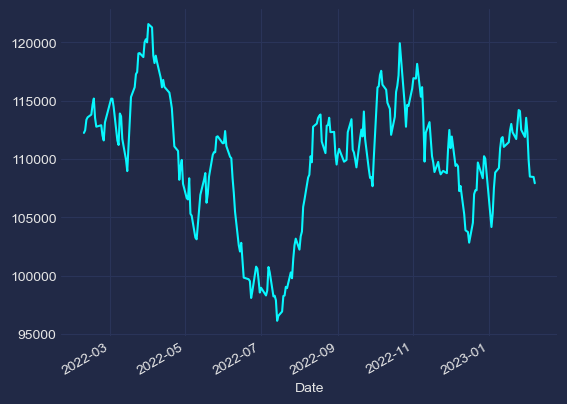

In [32]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y= 'Ibovespa', use_index = True, legend= False)